# Lesson 7: Simple Linear Regression (using sklearn - this uses matrices)

First note that linear regression, where we have x - independent variable (input), and y - dependent variable (output), represents Supervised Machine Learning. This means we have both the input and the output, and need to find the way how the model goes from x to y. This is done by finding the coefficients of the regression line.

## Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms

sms.set()

from sklearn.linear_model import LinearRegression  # Here I decide to use matrices to my linear 
                                                   # regression analysis.

## Load the data

In [6]:
data = pd.read_csv("1.01.Simple_linear_regression.csv")
data            # This method shows first 5 lines of my table with data.

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


## Create regression

### Define dependent and independent variables 

In [7]:
x = data["SAT"]
y = data["GPA"]

In [8]:
x.shape    # This shows me what type of mathematical structure is x. 
           # In this case it is a vector with 84 elements

(84,)

In [9]:
y.shape

(84,)

In [10]:
# Note that sklearn works on matrices that are 2-dim objects. We need to transform x, 
# which is now 1-dim object, into 2-dim form.

x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

### Regression

In [11]:
reg = LinearRegression()            # Here I use the class of sklearn "LinearRegression()", 
                                    # and "reg" is an instance of this class.
    
# Now we need to fit the regression:

reg.fit(x_matrix,y)

LinearRegression()

### R-squared

In [12]:
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

In [13]:
reg.coef_

array([0.00165569])

### Intercept

In [14]:
reg.intercept_

0.2750402996602803

### Making predictions

In [15]:
reg.predict([[1740]])

array([3.15593751])

In [16]:
new_data = pd.DataFrame(data=[1740,1760],columns=["SAT"])
new_data

,SAT
0,1740
1,1760


In [17]:
reg.predict(new_data)

/home/alina/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [18]:
new_data["Predicted GPA"] = reg.predict(new_data)
new_data

/home/alina/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


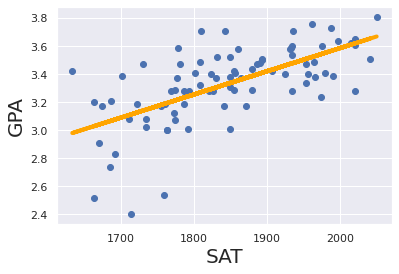

In [19]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
plt.plot(x,yhat,lw=4,c="orange",label="regression line")  # This is to plot the line.
plt.xlabel("SAT",fontsize=20)
plt.ylabel("GPA",fontsize=20)
plt.show()